In [1]:
import tensorflow as tf

In [2]:
# tensorflow version 확인
tf.__version__

'2.1.0'

초기화 : 신경망의 초깃값을 지정해주는 것
- 난수로 지정

In [3]:
# 3.7 균일분포로부터 난수 얻기
rand = tf.random.uniform([1], 0, 1)
rand
# 출력값 : <tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.40041852], dtype=float32)>
# Tensor 라는 객체 반환
# Tensor 참조 문서 : https://www.tensorflow.org/api_docs/python/tf/Tensor
# shape : Numpy 배열의 크기
# tensorflow의 data type 참조 문서 : https://www.tensorflow.org/api_docs/python/tf/dtypes/DType

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.4837861], dtype=float32)>

In [4]:
rand2 = tf.random.uniform([1], 0, 1, dtype=tf.dtypes.float64)  # 균일분포
                                                               # dtype 지정 가능
print(rand2)
rand3 = tf.random.uniform([4], 0, 1, dtype=tf.dtypes.float64)
print(rand3)
rand4 = tf.random.uniform([2,2], 0, 1, dtype=tf.dtypes.float64)
print(rand4)

tf.Tensor([0.88292244], shape=(1,), dtype=float64)
tf.Tensor([0.06665926 0.4787446  0.38236045 0.92304019], shape=(4,), dtype=float64)
tf.Tensor(
[[0.50388674 0.87898329]
 [0.35963303 0.9938934 ]], shape=(2, 2), dtype=float64)


In [5]:
print(rand2.shape)  # shape
print(rand2.dtype)  # data type
print(rand2.ndim)   # 차원

(1,)
<dtype: 'float64'>
1


In [6]:
# 정규분포로부터 난수 추출
rand = tf.random.normal([2,2], 0, 1)
rand

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[ 1.6063509 ,  0.0866224 ],
       [-1.162919  , -0.60771227]], dtype=float32)>

In [7]:
rand2 = tf.random.normal([4], 10, 2)
rand2

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([10.523198, 10.496577, 12.063929, 14.070225], dtype=float32)>

In [8]:
# 활성화함수 sigmoid 정의
import math
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

In [9]:
# 3.11 뉴런의 입력과 출력 정의
x = 1  # 입력
y = 0  # 기대출력
w = tf.random.normal([1], 0, 1)  # 입력의 가중치
output = sigmoid(x * w)
print(output)  # 출력
print(y - output)  # 오류 = 기대출력 - 출력

0.4138222897126233
-0.4138222897126233


In [10]:
# 3.12 경사하강법을 이용한 뉴런의 학습
x = 1
y = 0
w = tf.random.normal([1], 0, 1)

for i in range(1000):
    output = sigmoid(x * w)
    error = y - output  # 오류 = 기대출력 - 출력
    w = w + x * 0.1 * error  # 학습률=0.1 : 가중치(w)를 업데이트하는 정도
    
    if i % 100 == 99:
        print(f"{i}번째 학습, 오차: {error}, 출력값: {output}")
# 0.12에서 0.01까지 내려감
# 예측출력 0에 가까워짐

99번째 학습, 오차: -0.060127138685405986, 출력값: 0.060127138685405986
199번째 학습, 오차: -0.038200798231017775, 출력값: 0.038200798231017775
299번째 학습, 오차: -0.027880309286597592, 출력값: 0.027880309286597592
399번째 학습, 오차: -0.02191410158507182, 출력값: 0.02191410158507182
499번째 학습, 오차: -0.018036306397101624, 출력값: 0.018036306397101624
599번째 학습, 오차: -0.01531727533031426, 출력값: 0.01531727533031426
699번째 학습, 오차: -0.013306722394766879, 출력값: 0.013306722394766879
799번째 학습, 오차: -0.011760417440357397, 출력값: 0.011760417440357397
899번째 학습, 오차: -0.010534601846860843, 출력값: 0.010534601846860843
999번째 학습, 오차: -0.009539262235242067, 출력값: 0.009539262235242067


In [11]:
# 3.13 x=0, y=1을 얻는 뉴런의 학습
x = 0
y = 1
w = tf.random.normal([1], 0, 1)

for i in range(1000):
    output = sigmoid(x * w)
    error = y - output
    w = w + x * 0.1 * error
    
    if i % 100 == 99:
        print(f"{i}번째 학습, 오차: {error}, 출력값: {output}")

# 오차, 출력값 변하지 않음
# 이유? 입력값(x)=0 > w 변화 없음

# 이러한 상황을 방지하기 위해 편향(bias)를 뉴런에 넣어주자
# 편향의 입력 : 보편적으로 1 사용

99번째 학습, 오차: 0.5, 출력값: 0.5
199번째 학습, 오차: 0.5, 출력값: 0.5
299번째 학습, 오차: 0.5, 출력값: 0.5
399번째 학습, 오차: 0.5, 출력값: 0.5
499번째 학습, 오차: 0.5, 출력값: 0.5
599번째 학습, 오차: 0.5, 출력값: 0.5
699번째 학습, 오차: 0.5, 출력값: 0.5
799번째 학습, 오차: 0.5, 출력값: 0.5
899번째 학습, 오차: 0.5, 출력값: 0.5
999번째 학습, 오차: 0.5, 출력값: 0.5


In [12]:
# 3.14. x = 0, y = 0, 편향 추가
x = 0
y = 1
w = tf.random.normal([1], 0, 1)
b = tf.random.normal([1], 0, 1)  # bias(편향) 추가

for i in range(1000):
    output = sigmoid(x * w + 1 * b)  # 편향의 입력으로는 보통 1 사용
    error = y - output
    w = w + x * 0.1 * error
    b = b + 1 * 0.1 * error
    
    if i % 100 == 99:
        print(i, error, output)
# 0.89에서 0.99까지 올라감
# 예측출력 1에 가까워짐

99 0.09861463092050349 0.9013853690794965
199 0.05136169976156468 0.9486383002384353
299 0.03439826275554758 0.9656017372444524
399 0.02578088117290689 0.9742191188270931
499 0.020589040847005413 0.9794109591529946
599 0.017125932264596022 0.982874067735404
699 0.014654019256507889 0.9853459807434921
799 0.012802409989737584 0.9871975900102624
899 0.011364221059934954 0.988635778940065
999 0.010215218840161744 0.9897847811598383


In [13]:
# 3.16 첫 번째 신경망 네트워크 : AND
import numpy as np
x = np.array([   # 입력값
    [1, 1],
    [1, 0],
    [0, 1],
    [0, 0]
])
y = np.array([   # 기대출력
    [1],
    [0],
    [0],
    [0] 
])
w = tf.random.normal([2], 0, 1)  # 입력값의 가중치
                                 # 입력1, 입력2 -> 2개니까 가중치도 각각해서 총 2개
b = tf.random.normal([1], 0, 1)  # 편향(bias)
b_x = 1                          # 편향의 입력값
alpha = 0.1                      # 학습률

for i in range(2000):  # 학습수 : 2000번
    error_sum = 0
    for j in range(4): # 한 번 학습할 때마다 데이터 4개를 입력하니까
        output =  sigmoid(np.sum(x[j] * w) + b_x * b)  # 입력값 * 가중치를 다 더함
                                                       # 데이터 4개 + 편향 전체의 (입력값 * 가중치)의 합
                                                       # 참고) numpy의 ndarray는 *할 때 shape에 맞게 알아서 조절이 된다.
        error = y[j][0] - output  # 오차값 = 기대출력 - 출력
        
        # 경사하강법에 의한 가중치, 편향의 조정
        w = w + x[j] * alpha * error
        b = b + b_x * alpha * error
        error_sum += error                             # 데이터별로 error 나오니까 데이터 4개의 에러총 합이 학습 1번할때마다의 오류
    if i % 200 == 199:
        print(i, error_sum)
# print(x[0])  # [1 1]
# print(x[1])  # [1 0]
# print(x[2])  # [0 1]
# print(x[3])  # [0 0]
# print(w)  # 만약 [1.02~ 0.85~] 라면
# print(x[0] * w)  # [1 1] * [1.02~ 0.85~] = [1.02~ 0.85~]
# print(x[1] * w)  # [1 0] * [1.02~ 0.85~] = [1.02~ 0.]
# print(x[0] * w + x[1] * w + x[2] * w + x[3] * w + b_x * b)  # 각각의 입력값 * 가중치를 다 더한게 output. 출력값.

199 -0.11818289897546355
399 -0.06839015206162805
599 -0.04803385218261283
799 -0.036905020658468166
999 -0.029904995613793044
1199 -0.025107497789014086
1399 -0.02161909220252068
1599 -0.018972311147640888
1799 -0.016894664939920274
1999 -0.01522364457200579


In [14]:
# AND 신경망 네트워크 평가
# 학습 2000번 시킨 후의 결과로 평가
# 학습시킨 네트워크가 정상적으로 작동하는지 평가
# 네트워크에 각각의 입력값(x)들을 넣었을 때 실제출력(output)이 기대출력(y)값에 얼마나 가까운지 확인
for i in range(4):
    print("X:", x[i], "Y:", y[i], "Output:", sigmoid(np.sum(x[i] * w) + b_x * b))
# 출력값을 보면 각각의 기대출력인 1, 0, 0, 0값에 가깝게 나온다는 것을 확인할 수 있다.

X: [1 1] Y: [1] Output: 0.9644587735489167
X: [1 0] Y: [0] Output: 0.02518344174453798
X: [0 1] Y: [0] Output: 0.025261321692034967
X: [0 0] Y: [0] Output: 2.4671631863189085e-05


In [15]:
# 3.21 두 번째 신경망 네트워크 : OR
# AND 네트워크와의 차이점 : 기대출력(y)
x = np.array([
    [1, 1],
    [1, 0],
    [0, 1],
    [0, 0]
])
y = np.array([
    [1],
    [1],
    [1],
    [0]
])
w = tf.random.normal([2], 0, 1)
b = tf.random.normal([1], 0, 1)
b_x = 1
alpha = 0.1

for i in range(2000):
    error_sum = 0
    for j in range(4):
        output = sigmoid(np.sum(x[j] * w) + b_x * b)
        error = y[j][0] - output
        
        # 경사하강법에 의한 가중치, 편향의 조정
        w = w + x[j] * alpha * error
        b = b + b_x * alpha * error
        
        error_sum += error
    if i % 200 == 199:
        print(i, error_sum)

199 -0.04725326432444457
399 -0.025178519795628546
599 -0.01706951394884905
799 -0.012869451032649665
999 -0.010310266463498446
1199 -0.00859155104956804
1399 -0.0073592021874279295
1599 -0.00643326366548333
1799 -0.005713084875822574
1999 -0.005135456269314408


In [16]:
# OR 신경망 네트워크 평가
# 학습 2000번 시킨 후의 결과로 평가
for i in range(4):
    print("X:", x[i], "Y:", y[i], "Output:", sigmoid(np.sum(x[i] * w) + b_x * b))
# 출력값을 보면 각각의 기대출력인 1, 1, 1, 0에 가까운 실제출력값이 나온다는 것 확인 가능

X: [1 1] Y: [1] Output: 0.9999972285915084
X: [1 0] Y: [1] Output: 0.9898248736423556
X: [0 1] Y: [1] Output: 0.9897870083313061
X: [0 0] Y: [0] Output: 0.02546284067746668


In [17]:
# 3.23 세 번째 신경망 네트워크 : XOR
# XOR : 입력값들 중 참이 홀수개일 때만 -> 결과값 : 참
# AND, OR 신경망과의 차이점 : 기대출력(y)
x = np.array([
    [1, 1],
    [1, 0],
    [0, 1],
    [0, 0]
])
y = np.array([
    [0],
    [1],
    [1],
    [0]
])
w = tf.random.normal([2], 0, 1)
b = tf.random.normal([1], 0, 1)
b_x = 1
alpha = 0.1

for i in range(2000):
    error_sum = 0
    for j in range(4):
        output = sigmoid(np.sum(x[j] * w) + b_x * b)
        error = y[j][0] - output
        
        w = w + x[j] * alpha * error
        b = b + b_x * alpha * error
        
        error_sum += error
    
    if i % 200 == 199:
        print(i, error_sum)

# AND, OR 신경망 네트워크와는 다르게
# 어느순간 error_sum 이 변화하지 않는다.

199 0.0020543996514931218
399 8.351951697060933e-05
599 3.3961649210656475e-06
799 1.3960658451495078e-07
999 1.8614210173240053e-09
1199 1.8614210173240053e-09
1399 1.8614210173240053e-09
1599 1.8614210173240053e-09
1799 1.8614210173240053e-09
1999 1.8614210173240053e-09


In [18]:
# 3.24 XOR 신경망 네트워크 평가
# 학습 2000번 시킨 후의 결과로 평가
for i in range(4):
    print("X:", x[i], "Y:", y[i], "Output:", sigmoid(np.sum(x[i] * w) + b_x * b))
# 출력값을 보면 각각의 기대출력인 0, 1, 1, 0과 차이가 좀 있음..
# 입력값(x)이 변화하였는데도
# 실제출력값(output)은 0.5부근의 값을 보인다.
# 그 이유에 대해 알아보자.

X: [1 1] Y: [0] Output: 0.5128176323940516
X: [1 0] Y: [1] Output: 0.5128176314633411
X: [0 1] Y: [1] Output: 0.4999999990686774
X: [0 0] Y: [0] Output: 0.49999999813735485


In [19]:
# 3.25 XOR 신경망 네트워크의 가중치들(w, b) 확인
print("w:", w, "b:", b)
# 출력값 :
# w: tf.Tensor([5.1281769e-02 3.7252903e-09], shape=(2,), dtype=float32) b: tf.Tensor([-7.450581e-09], shape=(1,), dtype=float32)
# 가중치1 : 0.05
# 가중치2 : 0.000000003
# 편향 : -0.00000007
# 입력1이 입력2보다 큰 영향을 끼친다.
# 가중치1이 제일 영향이 크다.
# 가중치2, 편향은 거의 영향이 없다.
# 따라서 기대출력(y)과 실제출력(output) 사이의 차이가 크게 나오는 것이다.

w: tf.Tensor([5.1281769e-02 3.7252903e-09], shape=(2,), dtype=float32) b: tf.Tensor([-7.450581e-09], shape=(1,), dtype=float32)


In [20]:
# sigmoid 활성화 함수에 넣기 전, 중간계산값(입력값*가중치의 총합)과
# sigmoid 활성화 함수에 넣은 후 비교
for i in range(4):
    print("X:", x[i], "y:", y[i], "중간계산값:", np.sum(x[i]*w) + b_x * b, "출력값(sigmoid(중간계산값)):", sigmoid(np.sum(x[i]*w) + b_x * b))
    
# sigmoid 활성화 함수에 넣기전, 중간계산값이
# 점점 0에 가까워진다.
# 앞에서 0에 가까워지게 치우쳐지면 

# x = 0 -> w값 변화 없음
# 뉴런이 학습을 하지 못함.
# 한쪽으로 치우쳐진 상황임

# 이런 상황인것을 봤었다.
# 따라서 입력1에 따라 중간계산값에는 차이가 발생할 수 있지만
# 출력값(y)에는 별 차이가 없어진 것을 알 수 있다.

# 이렇게 가중치, 편향이 미치는 영향에 대해 더 자세히 알아보자.

X: [1 1] y: [0] 중간계산값: tf.Tensor([0.05128177], shape=(1,), dtype=float32) 출력값(sigmoid(중간계산값)): 0.5128176323940516
X: [1 0] y: [1] 중간계산값: tf.Tensor([0.05128176], shape=(1,), dtype=float32) 출력값(sigmoid(중간계산값)): 0.5128176314633411
X: [0 1] y: [1] 중간계산값: tf.Tensor([-3.7252903e-09], shape=(1,), dtype=float32) 출력값(sigmoid(중간계산값)): 0.4999999990686774
X: [0 0] y: [0] 중간계산값: tf.Tensor([-7.450581e-09], shape=(1,), dtype=float32) 출력값(sigmoid(중간계산값)): 0.49999999813735485


In [21]:
# 앞의 AND 신경망 네트워크의 가중치, 편향을 봐보자.
import numpy as np
x = np.array([   # 입력값
    [1, 1],
    [1, 0],
    [0, 1],
    [0, 0]
])
y = np.array([   # 기대출력
    [1],
    [0],
    [0],
    [0] 
])
w = tf.random.normal([2], 0, 1)  # 입력값의 가중치
                                 # 입력1, 입력2 -> 2개니까 가중치도 각각해서 총 2개
b = tf.random.normal([1], 0, 1)  # 편향(bias)
b_x = 1                          # 편향의 입력값
alpha = 0.1                      # 학습률

for i in range(2000):  # 학습수 : 2000번
    error_sum = 0
    for j in range(4): # 한 번 학습할 때마다 데이터 4개를 입력하니까
        output =  sigmoid(np.sum(x[j] * w) + b_x * b)  # 입력값 * 가중치를 다 더함
                                                       # 데이터 4개 + 편향 전체의 (입력값 * 가중치)의 합
                                                       # 참고) numpy의 ndarray는 *할 때 shape에 맞게 알아서 조절이 된다.
        error = y[j][0] - output  # 오차값 = 기대출력 - 출력
        
        # 경사하강법에 의한 가중치, 편향의 조정
        w = w + x[j] * alpha * error
        b = b + b_x * alpha * error
        error_sum += error                             # 데이터별로 error 나오니까 데이터 4개의 에러총 합이 학습 1번할때마다의 오류

print("w:", w, "b:", b)

# AND 신경망 네트워크의 가중치, 편향을 보면
# 가중치1 : 6.95
# 가중치2 : 6.95
# 편향 : -10.61
# 가중치1, 가중치2의 영향이 비슷하다. 편향의 영향도 크다.
# 따라서 AND 신경망 네트워크는 기대출력과 가까운 출력값이 나온다는 것을 확인가능

w: tf.Tensor([6.9634895 6.966645 ], shape=(2,), dtype=float32) b: tf.Tensor([-10.624362], shape=(1,), dtype=float32)


In [22]:
# XOR, AND 신경망 네트워크의 가중치, 편향 비교해보자
# AND 신경망 네트워크 : 어떤 일을 하려는지 명확하다!
# - 가중치1, 가중치2 비슷하다.
# - 입력1, 입력2 비슷한 중요도를 가진다.
# - 편향값 : 큰 음수 > 중간계산값을 음수로 보내는 경향을 가진다.
# - 가중치1, 가중치2를 합해야지 큰 음수값인 편향값에 준할 수 있다.

# XOR 신경망 네트워크 : 어떤 일을 하려는지 명확하지 않다ㅠㅠ
# - 중간계산값은 0에 가까워지고
# - 출력값은 0.5에 가까워질뿐이다.

# 즉, XOR 신경망 네트워크는 1개의 퍼셉트론으로 만들 수 없다는 것을 의미
# 여러개의 퍼셉트론이 필요하다!

## 퍼셉트론(Perceptron)=뉴런(Neuron)
- <img src='https://blog.kakaocdn.net/dn/RTcpC/btqCqOo58fi/zKpF0Lm1lTjLq1xZnkCrl1/img.png' width=500>
- 신경망(딥러닝)의 기원이 되는 알고리즘
- 입력층과 출력층 만으로 구성되는 알고리즘
- 다수의 신호 입력 -> 하나의 신호 출력
- 출력 : 0 또는 1
- 여러개의 퍼셉트론 사용 -> XOR 신경망 네트워크 등 어떠한 불린함수(Boolean function)이던지 풀 수 있다.
    - Boolean function이란?
    - 입력값 : 정수 -> 출력값 : 0 또는 1
    
    
- 활성화 함수
    - sigmoid : 출력값 0~1 사이
    - ReLU : 출력값 0이상 > 왜곡 적음
- 역전파
    - 역방향으로 오차를 전파시키면서 각층의 가중치를 업데이트하고 최적의 학습 결과를 찾아가는 방법
    
    
- 순전파 -> 오차발생 -> 역전파 -> 가중치 업데이트 -> 순전파.. 반복을 통해 오차값을 0에 가깝게 만든다.
    

- 퍼셉트론의 갯수 세기 : 가중치를 갖는 층(layer)의 갯수. 입력층을 제외함.
- 단순(단층) 퍼셉트론
    - 하나의 노드로 구성
    - 중간층, 출력층의 구분이 없는 구조
- 다층 퍼셉트론
    - 여러개의 중간층으로 구성



## 인공신경망(ANN : Artificial Neural Network)
- ![인공신경망 그림](https://upload.wikimedia.org/wikipedia/commons/thumb/4/46/Colored_neural_network.svg/300px-Colored_neural_network.svg.png)
 - 생물학의 신경망에서 영감을 얻은 통계학적 학습 알고리즘
 - 네트워크를 형성한 인공 뉴런이 학습을 통해 문제 해결 능력을 가지는 모델
 - 뉴런이 여러개 모여 층(layer)를 구성한 후, 이 층이 다시 모여 구성된 형태
     - layer : 뉴런 + 뉴런이 합쳐진 단위
 - 층
     - 입력층
     - 은닉층
     - 출력층
     
     
     
## 딥러닝(Deep Learning)
- 다층 인공신경망을 학습하는 알고리즘
- 여러 비선형 변환기법의 조합을 통해 높은 수준의 추상화를 시도하는 머신러닝 알고리즘 집합
    - 추상화?
    - 다량의 데이터, 자료들 속에서 핵심적인 내용, 기능을 요약하는 작업
    

    


## Keras란?
- python으로 작성된 오픈소스 신경망 라이브러리
- Tensorflow 위에서 작동된다.


- Tensorflow와 Keras의 차이점
- Tensorflow : 디테일한 설정 가능, 내부 구조 확인할 수 있는 디버거 사용가능
- Keras : 사용자 친화적, 간단한 조작만으로도 신경망 구성 가능

## keras sequential 모델
- sequential 객체 참고 : https://keras.io/ko/getting-started/sequential-model-guide/
- compile, fit 참고 : https://www.codeonweb.com/entry/fe7882d2-e42a-4ef3-bbc2-e616d366e013
- 레이어(layer, 층)을 선형으로 연결하여 구성한 것
- 레이어 인스턴스를 생성자에 전달 -> sequential 모델 구성

---
---
## keras sequential 모델 만들기
---
### 입력 형태 지정하기
- tf.keras.layers.Dense() : layer 정의
- Dense : 가장 기본적인 layer, 입력, 출력 사이에 잇는 모든 뉴런이 서로 연결되는 layer
    - parameter들
    - units : 양의 정수, 출력 공간의 차원 수, layer를 구성하는 뉴런의 수
        - 뉴런 많을수록 -> 레이어의 성능 좋아짐, 계산량 많아짐, 메모리 많이 차지
    - activation : 사용할 활성화 함수
    - input_shape : 형태정보, 튜플(정수 또는 None(임의의 양의 정수))
        - 1번째 layer에서만 정의
        - Dense(32, input_shape=(784,))
        - Dense(32, input_dim=784)    위의 두 식은 동일
    - input_shape, input_dim, input_length
    - batch_size : batch 데이터 크기
    ```python
    from keras.models import Sequential
    from keras.layers import Dense, Activation
    
    model = Sequential([               # 방법 1
        Dense(32, input_shape=(784,)),
        Activation("relu"),
        Dense(10),
        Activation("softmax"),
        ])
    
    model = Sequential()                # 방법 2
    model.add(Dense(32, input_dim=784))
    model.add(Activation("relu"))
    ```
    
    두 코드는 동일

---
### 컴파일
- 모델 학습 전 학습 과정 구성
- 최적화기(optimizer) : 정규화기
    - 종류 : rmsprop, adagrad
- 손실함수(loss function) : 모델이 최소화하려고 하는 대상, 기본제공되는 손실함수의 문자열 식별자 또는 목표함수 자체
    - 종류 : categorical_crossentropy, mse
- 메트릭(metric) : 기본제공되는 메트릭 또는 사용자정의 메트릭함수의 문자열 식별자
    - 종류 : accuracy
    ```python
    # For a multi-class classification problem
        model.compile(optimizer="rmsprop",
                      loss="categorical+corssentropy",
                      metrics=["accuracy"])
    
    # For a binary classification problem
        model.compile(optimizer="rmsprop",
                      loss="binary_corssentropy",
                      metrics=["accuracy"])
    
    # For a mean squared error regression problem
        model.compile(optimizer="rmsprop",
                      loss="mse")
    
    # For custom metrics
        import keras.backend as K
        def mean_pred(y_true, y_pred):
            return K.mean(y_pred)
        model.compile(optimizer="rmsprop",
                      loss="binary_corssentropy",
                      metrics=["accuracy", mean_pred])
    ```

---
### 훈련
- keras 모델은 Numpy 배열로 이루어진 입력 데이터, 레이블을 기반으로 훈련
- 정해진 횟수의 epoch 동안 모델을 훈련
- 일반적으로 fit 함수 사용
    - x : 입력
    - y : 기대출력
    - epochs : 정수, 훈련 데이터를 반복학습시키는 횟수
    - batch_size : 정수, 기울기를 업데이트할 샘플의 갯수, 한번에 학습시킬 데이터의 수
    - 컴퓨터 메모리를 절약하기 위해 데이터를 나눠서 하는 것
        - ex) 데이터의 총 갯수 : 1000개, batch_size=10 이면,
        - 데이터 10개씩 100번의 step을 거치면 훈련을 1번 한 것이다.
        - <img src="https://t1.daumcdn.net/cfile/tistory/99E8AF365B79165C34">
        
    ```python
    model.fit(data, labels, epochs=10, batch_size=32)
    ```
---
---

## 이항분류
- 데이터에 선 1개 그어서 분류
- 주로 sigmoid 함수 사용


$$
s(z)=\frac{1}{1+e^{-z}}
$$
<img src='https://t1.daumcdn.net/cfile/tistory/2312763759272E5B16' width=200>


## 다항분류
- 데이터에 선을 2개 이상 그어서 분류
- softmax 함수 사용


$$
P_{i}(X_1,X_2)=\frac{e^{f_{i}(x_1, x_2)}}{e^{f_{1}(x_1, x_2)}+e^{f_{2}(x_1, x_2)}+...+e^{f_{k}(x_1, x_2)}}
$$


<img src='https://t1.daumcdn.net/cfile/tistory/247E883D5927860832' width=400>




In [23]:
# 3.27 tf.keras를 이용한 XOR 신경망 네트워크 계산
# 3개의 퍼셉트론과 뉴런 사용해서 XOR 신경망 네트워크를 만들어보자.
# 입력층 -> 레이어 -> 레이어 -> 뉴런
# 입력층을 제외하니 3개의 퍼셉트론이 맞다.
import numpy as np
x = np.array([
    [1, 1],
    [1, 0],
    [0, 1],
    [0, 0]
])
y = np.array([
    [0],
    [1],
    [1],
    [0]
])

<img src='https://t2.daumcdn.net/thumb/R720x0/?fname=http://t1.daumcdn.net/brunch/service/user/17Xk/image/TBYWCZ-LE5jUYkWph1WbrLRUudY.png' width=400>

In [24]:
model = tf.keras.Sequential([                    # tf.keras.layers.Dense() : layer 정의
                                                 # Dense : 입력, 출력 사이의 모든 뉴런이 서로 연결되는 레이어
    tf.keras.layers.Dense(units=2,               # 레이어를 구성하는 뉴런의 수  # 입력1, 입력2를 받으므로 2개
                         activation="sigmoid",   # 사용할 활성화 함수
                         input_shape=(2,)),      # 형태 정보  # 입력1, 입력2
    tf.keras.layers.Dense(units=1,               # 출력 공간의 차원 수  # 레이어1에서의 결과값을 받으므로 1차원  # 그 후 출력층~
                         activation="sigmoid")
])

In [25]:
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.1),  # compile : 모델이 실제로 동작할 수 있도록 환경 준비
              # optimizer : 최적화 함수 : 사용할 딥러닝의 최적화 함수 학습식
              # SGD : Stochastic Gradient Descent : 경사 하강법
             loss="mse")  # 손실 : MSE(평균제곱오차)  # 앞부분의 error와 비슷한 개념. 최소화해야 함.

In [26]:
model.summary()  # summary() 함수를 통해 인공신경망의 구조 확인
# layer(층)     shape     parameter 수(bias도 사실 있음. 가중치의 총 갯수)
# parameter 수 : (입력측 뉴런의 수 + 1) * (출력측 뉴런의 수)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 6         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [27]:
# 이제 이 네트워크를 실제로 학습시켜보자.
history = model.fit(x, y,
                   epochs=2000, batch_size=1)
# loss : 0.2584 -> loss : 0.0149로 손실율이 줄어들었다.

Train on 4 samples
Epoch 1/2000
4/4 [==============================] - 1s 228ms/sample - loss: 0.2609
Epoch 2/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.2604
Epoch 3/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.2600
Epoch 4/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.2596
Epoch 5/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.2591
Epoch 6/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.2588
Epoch 7/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.2585
Epoch 8/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.2582
Epoch 9/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.2581
Epoch 10/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.2579
Epoch 11/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.2578
Epoch 12/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.2576
Epoc

In [28]:
# tf.keras를 이용한 2-layer XOR 신경망 네트워크 평가
model.predict(x)
# 출력값을 보면 기대출력인 0 1 1 0에 가깝게 나왔다.
# 앞의 1-layer XOR 신경망 네트워크에서는 전부다 출력값이 0.5부근으로
# 2-layer XOR 신경망 네트워크의 정확도 > 1-layer XOR 신경망 네트워크의 정확도

array([[0.4971    ],
       [0.48209283],
       [0.52244   ],
       [0.5037765 ]], dtype=float32)

In [29]:
# 가중치 확인 : model.wieghts
for weight in model.weights:
    print(weight)
# dense/kernel : 입력 - 레이어 또는 레이어 - 레이어 가중치
# dense/bias : 편향 - 레이어 가중치

<tf.Variable 'dense/kernel:0' shape=(2, 2) dtype=float32, numpy=
array([[-0.02483902, -1.1188587 ],
       [-0.24877912,  0.4431052 ]], dtype=float32)>
<tf.Variable 'dense/bias:0' shape=(2,) dtype=float32, numpy=array([-0.03945808, -0.4263366 ], dtype=float32)>
<tf.Variable 'dense_1/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[-0.48612872],
       [ 0.40955296]], dtype=float32)>
<tf.Variable 'dense_1/bias:0' shape=(1,) dtype=float32, numpy=array([0.09160173], dtype=float32)>


가중치 표기
- 위 첨자 : 레이어 번호
- 아래 첨자: 입력측번호 출력측번호
$$
w_{12}^1
$$


=> 레이어1 / 입력측 : 2번 뉴런(입력2, x2) / 출력측 : 1번 뉴런

$$
w_{31}^2
$$

=> 레이어2 / 입력측 : 3번 뉴런(bias꺼) / 출력측 : 1번 뉴런

## 시각화
matplotlib.pyplot 라이브러리 이용

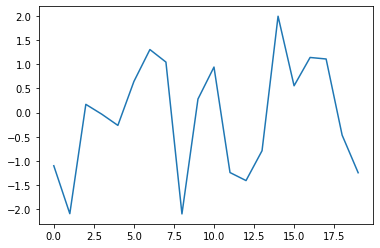

In [30]:
# 3.31 간단한 꺾은선 그래프 그리기 : plt.plot
import matplotlib.pyplot as plt
x = range(20)
y = tf.random.normal([20], 0, 1)
plt.plot(x, y)
plt.show()

In [ ]:
# 3.32 간단한 점 그래프 그리기
import matplotlib.pyplot as plt
x = range(20)
y = tf.random.normal([20], 0, 1)
plt.plot(x, y, 'bo')
# 설정값
# 색깔 : 파랑(b), 빨강(r), 노랑(y)
plt.show()

In [ ]:
# 3.33 정규분포 히스토그램 : plt.hist
import matplotlib.pyplot as plt
x = tf.random.normal([100000], 0, 1)
plt.hist(x, bins=100)
plt.show(x)

In [ ]:
plt.hist(x, bins=1000)

In [ ]:
# 딥러닝을 학습시킬 때 가장 많이 보게 될 그래프 : 학습 잘되고 있는지 확인하기 위한 측정치(metric) 변화량을 나타내는 선 그래프
# 분류 등에서는 정확도(accuracy) 등 다른 측정치도 관찰
# 3.28에서 model.fit할 때의 내용(tf.keras가 학습을 진행한 내용)을 history라는 변수에 저장함
print(history)